# Computational tools for data science - project

Laoading data and first exploratory analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv('data/netflix_titles.csv')
amazon = pd.read_csv('data/amazon_prime_titles.csv')
hulu = pd.read_csv('data/hulu_titles.csv')
disney = pd.read_csv('data/disney_plus_titles.csv')

main = pd.read_csv('data/TMDB_all_movies.csv')

In [3]:
main.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,suomi,"Tomi Salmela, Jaakko Talaskivi, Hannu Kivisalo...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,"suomi, English, svenska","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Rodrigo García, Guillermo Navarro, Phil Parmet...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Christine Harnos, Lauren Robinson, Deirdre Kel...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Lloyd Segan, Gene Levy, Marilyn Vance",Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Remove TV shows (we only want movies)
def remove_tv_show(df):
    return df[df['type'] == 'Movie']

print('Before removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(disney.shape)

netflix = remove_tv_show(netflix)
disney = remove_tv_show(disney)
hulu = remove_tv_show(hulu)
amazon = remove_tv_show(amazon)

#dimension of the dataset
print('After removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(disney.shape)

Before removing shows
(8807, 12)
(9668, 12)
(3073, 12)
(1450, 12)
After removing shows
(6131, 12)
(7814, 12)
(1484, 12)
(1052, 12)


In [6]:
#add platform column to main dataset
def platform_column(main, platform, platform_name):
    for index, row in main.iterrows():
        if row['title'] in platform['title'].values: #cambiar dependiendo del nombre de la columna
            main.loc[index, platform_name] = 1
        else:
            main.loc[index, platform_name] = 0
    return main

In [ ]:
# main_netflix = platform_column(main, netflix, 'Netflix')
# main_net_ama = platform_column(main_netflix, amazon, 'Amazon')
# main_net_ama_hulu = platform_column(main_net_ama, hulu, 'Hulu')
# main_complete = platform_column(main_net_ama_hulu, disney, 'Disney')

Run from here!

In [4]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
main_complete.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO,sentiment
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0,68.24
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0,73.44
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0,86.06
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,0.0,1.0,0.0,0.0,0.0,79.34
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg,0.0,0.0,0.0,0.0,0.0,382.44


1009839


In [6]:
#count the number of movies in each platform
def count_movies(df, platform_name):
    return df[platform_name].sum()

In [7]:
netflix_count = count_movies(main_complete, 'Netflix')
print(netflix_count)
amazon_count = count_movies(main_complete, 'Amazon')
print(amazon_count)
hulu_count = count_movies(main_complete, 'Hulu')
print(hulu_count)
disney_count = count_movies(main_complete, 'Disney')
print(disney_count)

36998.0
108669.0
15330.0


KeyError: 'Disney'

In [10]:
#count the number of movies in more than one platform (take in consideration two, three and four platforms)
count = 0
for index, row in main_complete.iterrows():
    if row['Netflix'] + row['Amazon'] + row['Hulu'] + row['Disney'] > 1:
        count += 1
print(count)

3103


In [11]:
#identify which movies are in more than one platform
def more_than_one_platform(df):
    return df[(df['Netflix'] + df['Amazon'] + df['Hulu'] + df['Disney']) > 1]

in_platforms = more_than_one_platform(main_complete)

In [12]:
in_platforms

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Disney
45,79,Hero,7.500,2226.0,Released,2002-07-22,177394432.0,99.0,31000000.0,tt0299977,...,"Zhang Yimou, Bin Wang, Feng Li","Zhang Zhenyan, Shoufang Dou, Zhang Weiping, Bi...",Tan Dun,7.9,189136.0,/1NBtOH3KPU9UUp1vzVHJ8qzdW88.jpg,1.0,1.0,0.0,0.0
229,277,Underworld,6.800,6057.0,Released,2003-09-19,95708457.0,122.0,22000000.0,tt0320691,...,"Kevin Grevioux, Len Wiseman, Danny McBride","Gary Lucchesi, Richard S. Wright, Terry McKay,...",Paul Haslinger,7.0,289447.0,/zsnQ41UZ3jo1wEeemF0eA9cAIU0.jpg,1.0,1.0,1.0,0.0
392,504,Monster,7.200,2269.0,Released,2003-12-24,60400000.0,110.0,8000000.0,tt0340855,...,Patty Jenkins,"Meagan Riley-Grant, Mark Damon, Sammy Lee, Cla...",BT,7.3,164908.0,/aevmNtJCNG4ZlfEeEGZ79frMUes.jpg,1.0,1.0,0.0,0.0
436,559,Spider-Man 3,6.431,13993.0,Released,2007-05-01,894983373.0,139.0,258000000.0,tt0413300,...,"Steve Ditko, Sam Raimi, Stan Lee, Todd McFarla...","Grant Curtis, Joseph M. Caracciolo Jr., Stan L...",Christopher Young,6.3,652221.0,/qFmwhVUoUSXjkKRmca5yGDEXBIj.jpg,1.0,0.0,1.0,0.0
465,591,The Da Vinci Code,6.700,9202.0,Released,2006-05-17,767800000.0,149.0,125000000.0,tt0382625,...,"Akiva Goldsman, Dan Brown","Todd Hallowell, John Calley, Brian Grazer, Ron...",Hans Zimmer,6.6,465177.0,/9ejKfNk0LBhSI9AahH4f9NJNZNM.jpg,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009302,1378729,Home,0.000,0.0,In Production,2024-11-07,0.0,11.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,/jvtBswbiRWLTDEWaIcpMyqFgrTD.jpg,1.0,1.0,0.0,0.0
1009336,1378767,Daphne,0.000,0.0,Released,2024-09-01,0.0,0.0,0.0,NaN,...,"M. Mainetti, Nicola Bianchi","M. Mainetti, Nicola Bianchi, Claudio Braccini,...",NaN,NaN,NaN,/cYnEPg0Ae0GLIoUFZdLsvOtgnRn.jpg,0.0,1.0,1.0,0.0
1009349,1378781,The Giant,0.000,0.0,Released,2012-08-09,0.0,21.0,0.0,tt2097930,...,David Raboy,Ella Hatamian,Ari Balouzian,6.4,19.0,/duRA2LRX6232ZRgWPQhMmVNzjJE.jpg,1.0,1.0,0.0,0.0
1009388,1378823,Red,0.000,0.0,Released,NaN,0.0,14.0,0.0,NaN,...,"Hanaa Attia, gameela wify",NaN,NaN,NaN,NaN,/crCMpOm9C49MfNnGXvcEuIyhNl8.jpg,1.0,1.0,0.0,0.0


In [13]:
main_complete.dtypes

id                           int64
title                       object
vote_average               float64
vote_count                 float64
status                      object
release_date                object
revenue                    float64
runtime                    float64
budget                     float64
imdb_id                     object
original_language           object
original_title              object
overview                    object
popularity                 float64
tagline                     object
genres                      object
production_companies        object
production_countries        object
spoken_languages            object
cast                        object
director                    object
director_of_photography     object
writers                     object
producers                   object
music_composer              object
imdb_rating                float64
imdb_votes                 float64
poster_path                 object
Netflix             

Genres

In [14]:
# different possible genres in the dataset
main_complete['genres'].unique()
print("There are ", len(main_complete['genres'].unique()), "different genres in the dataset")
print("The genres are:", main_complete['genres'].unique())

main_complete['genres']

# check how many movies have no genre
nulls = main_complete['genres'].isnull().sum()
print("This percentage of movies have no genre:", nulls/len(main_complete)*100)


There are  14303 different genres in the dataset
The genres are: ['Comedy, Drama, Romance, Crime' 'Comedy, Drama, Romance' 'Comedy' ...
 'Romance, History, Music' 'Documentary, Crime, History, Drama'
 'Music, Romance, Adventure, Animation, Fantasy']
This percentage of movies have no genre: 29.076318106153554


We need to create a list with the different genres in each movie

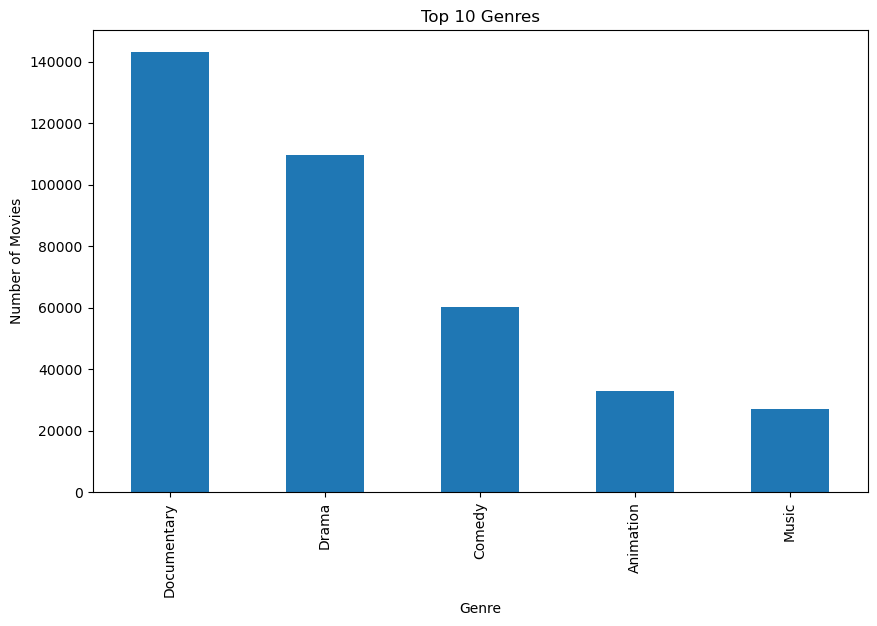

In [24]:
# plot the histogram of genres
plt.figure(figsize=(10, 6))
main_complete['genres'].value_counts().head().plot(kind='bar')
plt.title('Top 10 Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.show()

# Clustering


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
main_complete.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO,sentiment
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0,68.24
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0,73.44
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0,86.06
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,0.0,1.0,0.0,0.0,0.0,79.34
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg,0.0,0.0,0.0,0.0,0.0,382.44


In [11]:
#see column vote_average in main dataset 

features = ['vote_average', 'vote_count', 'imdb_rating', 'imdb_votes', 'imdb_rating_missing']
var = features[2]

print('Max. number: ', max(main_complete[var]))
print('Min number: ', min(main_complete[var]))

#count how many nans are in the vote_average column
nulls = main_complete[var].isnull().sum()
print('Number of NaNs: ', nulls)

#count how many 0 are in the vote_average column
zero = (main_complete[var] == 0).sum()
print('Number of 0s: ', zero)

#count how many 10 are in the vote_average column
ten = (main_complete[var] == 10).sum()
print('Number of 10s: ',ten)

# count how many 11 are in the vote_average column
one = (main_complete[var] == 1).sum()
print('Number of 1s: ',one)

print(len(main_complete[var]))

print(nulls/len(main_complete)*100) #percentage of nans in the column

Max. number:  10.0
Min number:  1.0
Number of NaNs:  582264
Number of 0s:  0
Number of 10s:  122
Number of 1s:  41
1009839
57.65909219192367


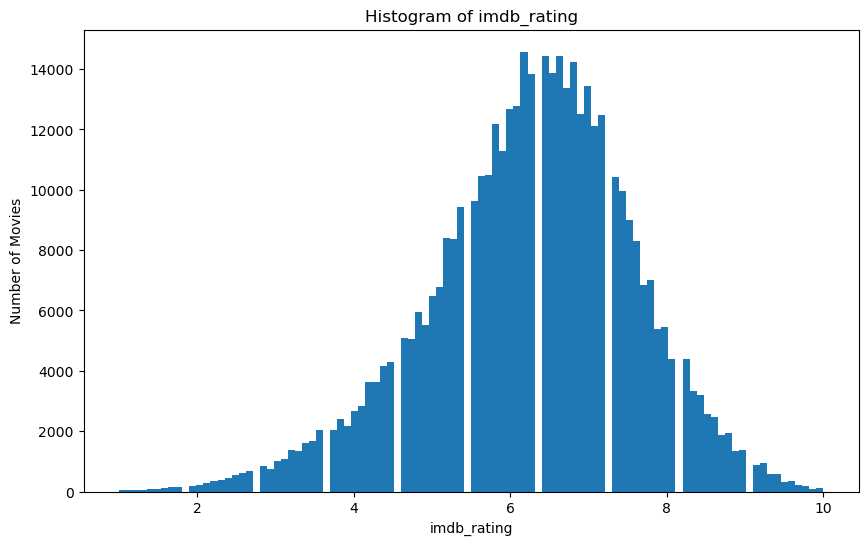

In [12]:
# plot histogram of vote_average and vote_count
var = features[2]
plt.figure(figsize=(10, 6))
main_complete[var].plot(kind='hist', bins=100)
plt.title('Histogram of ' + var)
plt.ylabel('Number of Movies')
plt.xlabel(var)
plt.show()


In [4]:
# create a new column with 0 if the column imdb_rating has a NaN and 1 if it has a value
main_complete['imdb_rating_missing'] = main_complete['imdb_rating'].isna().astype(int)

In [5]:
# convert to 0 all the NaN values in the column imdb_votes
main_complete['imdb_votes'] = main_complete['imdb_votes'].fillna(0)

In [ ]:
# convert to 0 all the NaN values in the column imdb_count
# main_complete['imdb_rating'] = main_complete['imdb_rating'].fillna(0)

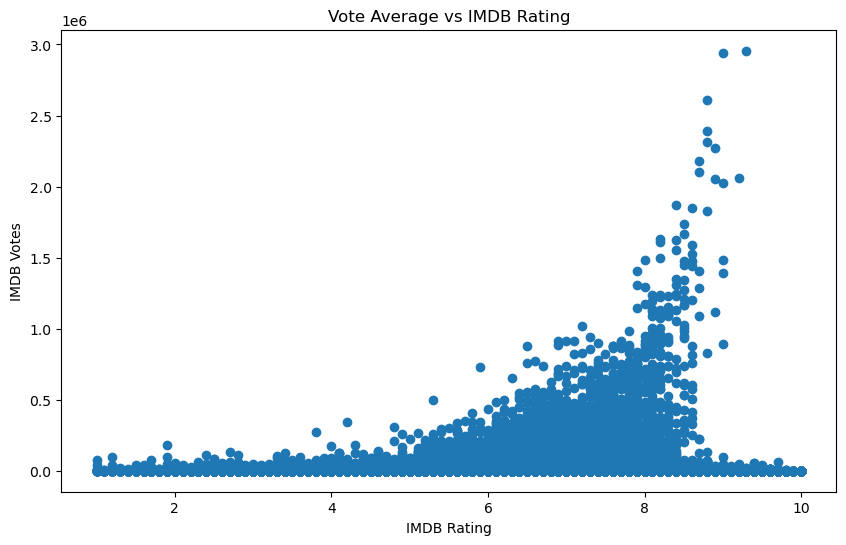

Correlation between vote_average and imdb_rating: 0.05067879082210548


In [15]:
# plot scatter plot of vote_average vs imdb_rating
plt.figure(figsize=(10, 6))
plt.scatter(main_complete['imdb_rating'], main_complete['imdb_votes'])
plt.title('Vote Average vs IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('IMDB Votes')
plt.show()

# compute correlation between vote_average and imdb_rating
correlation = main_complete['imdb_votes'].corr(main_complete['imdb_rating'])
print('Correlation between vote_average and imdb_rating:', correlation)


In [107]:
# see the 10 movies with higher imdb votes
main_complete.sort_values('imdb_votes', ascending=False).head(10)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,producers,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Disney,imdb_rating_missing
230,278,The Shawshank Redemption,8.700,27018.0,Released,1994-09-23,2.834147e+07,142.0,25000000.0,tt0111161,...,"David V. Lester, Niki Marvin, Liz Glotzer",Thomas Newman,9.3,2956023.0,/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg,0.0,0.0,0.0,0.0,0
116,155,The Dark Knight,8.515,32751.0,Released,2008-07-16,1.004558e+09,152.0,185000000.0,tt0468569,...,"Michael Uslan, Thomas Tull, Charles Roven, Ben...","James Newton Howard, Hans Zimmer",9.0,2937756.0,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,0.0,0.0,0.0,0.0,0
16347,27205,Inception,8.400,36443.0,Released,2010-07-15,8.255328e+08,148.0,160000000.0,tt1375666,...,"Kanjirô Sakura, Yoshikuni Taki, Christopher No...",Hans Zimmer,8.8,2607032.0,/ljsZTbVsrQSqZgWeep2B1QiDKuh.jpg,1.0,0.0,0.0,0.0,0
428,550,Fight Club,8.438,29262.0,Released,1999-10-15,1.008538e+08,139.0,63000000.0,tt0137523,...,"Arnon Milchan, Ceán Chaffin, Art Linson, Ross ...","John King, Michael Simpson",8.8,2388290.0,/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg,0.0,0.0,0.0,0.0,0
8,13,Forrest Gump,8.473,27309.0,Released,1994-06-23,6.773877e+08,142.0,55000000.0,tt0109830,...,"Steve Tisch, Steve Starkey, Wendy Finerman",Alan Silvestri,8.8,2313221.0,/arw2vcBveWOVZr6pxd9XTd1TdQa.jpg,0.0,0.0,0.0,0.0,0
550,680,Pulp Fiction,8.488,27794.0,Released,1994-09-10,2.139288e+08,154.0,8500000.0,tt0110912,...,"Michael Shamberg, Lawrence Bender, Danny DeVit...",NaN,8.9,2270247.0,/d5iIlFn5s0ImszYzBPb8JPIfbXD.jpg,1.0,0.0,0.0,0.0,0
96741,157336,Interstellar,8.400,35422.0,Released,2014-11-05,7.017292e+08,169.0,165000000.0,tt0816692,...,"Emma Thomas, Christopher Nolan, Jordan Goldber...",Hans Zimmer,8.7,2182644.0,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,0.0,0.0,0.0,0.0,0
477,603,The Matrix,8.200,25534.0,Released,1999-03-31,4.635174e+08,136.0,63000000.0,tt0133093,...,"Joel Silver, Andrew Mason, Erwin Stoff, Bruce ...",Don Davis,8.7,2099015.0,/p96dm7sCMn4VYAStA6siNz30G1r.jpg,1.0,0.0,0.0,0.0,0
192,238,The Godfather,8.700,20516.0,Released,1972-03-14,2.450664e+08,175.0,6000000.0,tt0068646,...,"Francis Ford Coppola, Robert Evans, Albert S. ...",Nino Rota,9.2,2060807.0,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,0.0,0.0,0.0,0.0,0
84,120,The Lord of the Rings: The Fellowship of the Ring,8.400,25035.0,Released,2001-12-18,8.713684e+08,179.0,93000000.0,tt0120737,...,"Harvey Weinstein, Mark Ordesky, Fran Walsh, Bo...",Howard Shore,8.9,2053650.0,/6oom5QYQ2yQTMJIbnvbkBL9cHo6.jpg,0.0,0.0,0.0,0.0,0


In [ ]:
# replace missing imdb_rating values with vote_average
# main_complete['imdb_rating'] = main_complete['imdb_rating'].fillna(main_complete['vote_average'])

In [ ]:
# delete the rows with NaNs in the vote_average column
# main_complete = main_complete.dropna(subset=['vote_average'])

I will work only with imdb_rating and imdb_vote, but we can add more variables after this

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
features = main_complete[['imdb_rating', 'imdb_votes', 'imdb_rating_missing']]

print(features)

         imdb_rating  imdb_votes  imdb_rating_missing
0                7.4      8735.0                    0
1                7.5      7484.0                    0
2                6.7    112484.0                    0
3                6.6     19268.0                    0
4                8.2       284.0                    0
...              ...         ...                  ...
1009834          NaN         0.0                    1
1009835          NaN         0.0                    1
1009836          NaN         0.0                    1
1009837          NaN         0.0                    1
1009838          NaN         0.0                    1

[1009839 rows x 3 columns]


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

selected_features = main_complete[['vote_average', 'vote_count']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)


# Step 4: Apply KMeans clustering to group_1
kmeans2 = KMeans(n_clusters=3, random_state=42)
selected_features['cluster'] = kmeans2.fit_predict(scaled_data)

# Step 5: Visualize the clustering results for group_1
plt.figure(figsize=(8, 6))
scatter = plt.scatter(selected_features['vote_average'], selected_features['vote_count'], c=selected_features['cluster'], cmap='viridis', alpha=0.6)

# Add a colorbar
plt.colorbar(scatter, label='Cluster')

# Annotate the plot
plt.title('Clustering Movies in Group 1')
plt.xlabel('IMDb Rating')
plt.ylabel('IMDb Votes')

# Add a grid for better visual separation
plt.grid(True)



ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

OK

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fill missing IMDb ratings with 0 for clustering
main_complete['imdb_rating_filled'] = main_complete['imdb_rating'].fillna(0)

# Step 2: Take a random sample of 20% of the data
sample_data = main_complete.sample(frac=0.6, random_state=42)

# Step 3: Select the features ('imdb_rating_filled' and 'imdb_votes')
features = sample_data[['imdb_rating_filled', 'imdb_votes']]

# Step 4: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
sample_data['cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sample_data['imdb_rating_filled'], sample_data['imdb_votes'], c=sample_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Clustering Movies (Including Unrated Movies)')
plt.xlabel('IMDb Rating (Filled)')
plt.ylabel('IMDb Votes')
plt.grid(True)
plt.show()



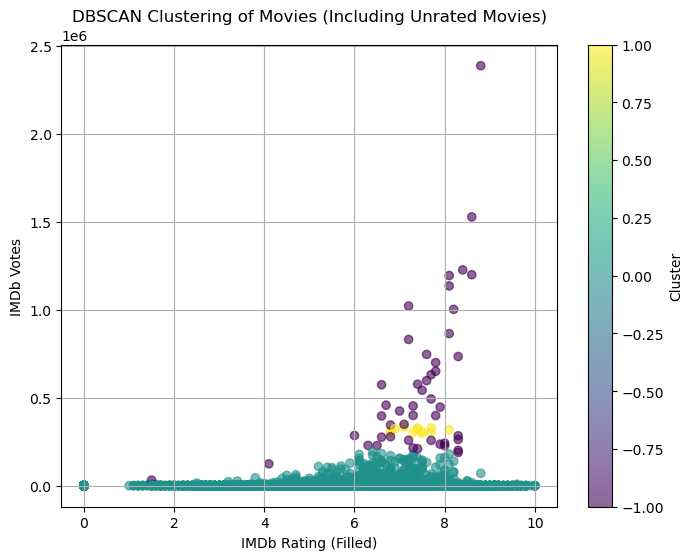

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fill missing IMDb ratings with 0 for clustering
main_complete['imdb_rating_filled'] = main_complete['imdb_rating'].fillna(0)

# Step 2: Take a random sample of 20% of the data to prevent kernel from dying
sample_data = main_complete.sample(frac=0.05, random_state=42)

# Step 3: Select the features ('imdb_rating_filled' and 'imdb_votes')
features = sample_data[['imdb_rating_filled', 'imdb_votes']]

# Step 4: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust `eps` and `min_samples` based on your data
sample_data['cluster'] = dbscan.fit_predict(scaled_features)

# Step 6: Plot the results
plt.figure(figsize=(8, 6))

# Plot data points, color the points based on the cluster assigned
scatter = plt.scatter(sample_data['imdb_rating_filled'], sample_data['imdb_votes'], c=sample_data['cluster'], cmap='viridis', alpha=0.6)

# Add a colorbar
plt.colorbar(scatter, label='Cluster')

# Add title and labels
plt.title('DBSCAN Clustering of Movies (Including Unrated Movies)')
plt.xlabel('IMDb Rating (Filled)')
plt.ylabel('IMDb Votes')
plt.grid(True)

# Show the plot
plt.show()


Heriarchical Clustering

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fill missing IMDb ratings with 0 for clustering
main_complete['imdb_rating_filled'] = main_complete['imdb_rating'].fillna(0)

# Step 2: Take a smaller random sample (e.g., 5% of the data)
sample_data = main_complete.sample(frac=0.05, random_state=42)

# Step 3: Select the features ('imdb_rating_filled' and 'imdb_votes')
features = sample_data[['imdb_rating_filled', 'imdb_votes']]

# Step 4: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply Hierarchical Clustering using Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4)  # You can adjust n_clusters
sample_data['cluster'] = agg_clust.fit_predict(scaled_features)

# Step 6: Plot the results (scatter plot)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sample_data['imdb_rating_filled'], sample_data['imdb_votes'], c=sample_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Hierarchical Clustering of Movies (Including Unrated Movies)')
plt.xlabel('IMDb Rating (Filled)')
plt.ylabel('IMDb Votes')
plt.grid(True)
plt.show()


: 